In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
np.random.seed(10)
%matplotlib inline
plt.rc('figure', figsize=(10,6))

In [3]:
tmean = 28

In [4]:
# 30-point data (bkk temparature)
y = np.random.randn(30)+tmean
y

array([29.3315865 , 28.71527897, 26.45459971, 27.99161615, 28.62133597,
       27.27991444, 28.26551159, 28.10854853, 28.00429143, 27.82539979,
       28.43302619, 29.20303737, 27.03493433, 29.02827408, 28.22863013,
       28.44513761, 26.86339779, 28.13513688, 29.484537  , 26.92019511,
       26.02227172, 26.2566277 , 28.26607016, 30.38496733, 29.12369125,
       29.67262221, 28.09914922, 29.39799638, 27.72875201, 28.61320418])

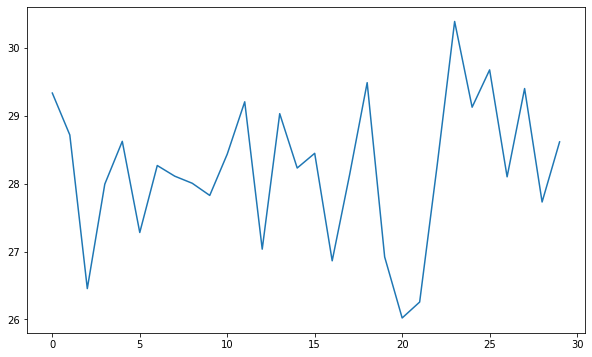

In [7]:
plt.plot(y)

In [8]:
# x = [10,11,12,13,14,....,39]
x = np.arange(len(y)) + 10
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

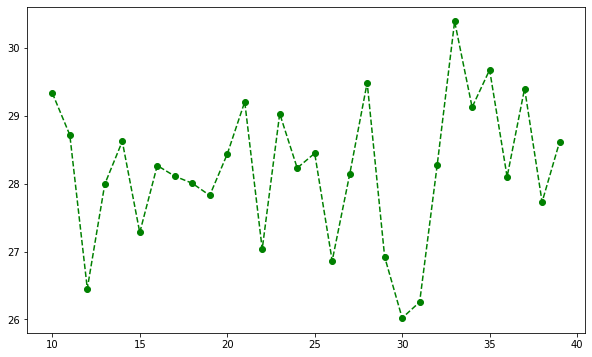

In [10]:
plt.plot(x,y, 'g--o')

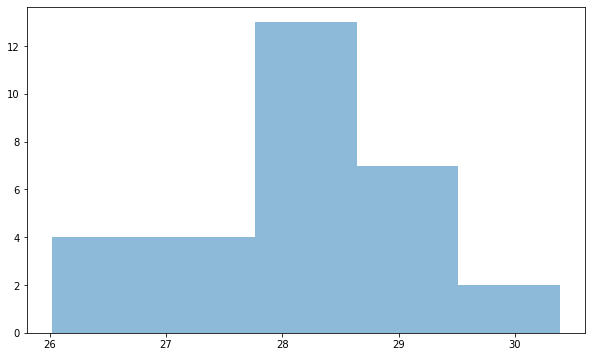

In [11]:
# histogram
plt.hist(y, bins=5, alpha=0.5)
plt.show()

In [12]:
# another 30-point data (tokoy temprature)
yc = np.random.randn(30)+tmean
d = np.arange(len(y))+1
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

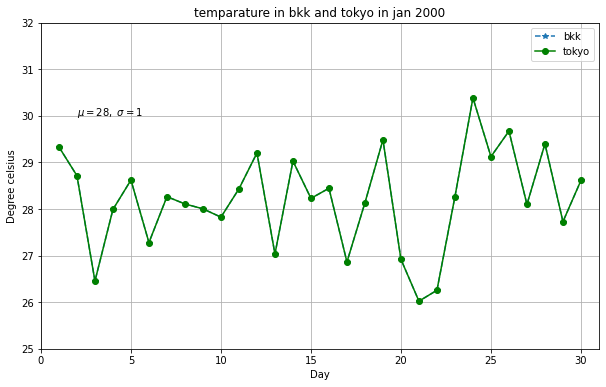

In [13]:
plt.plot(d,y,'--*',label='bkk')
plt.plot(d,yc,'g-o',label='tokyo')
plt.legend(loc='upper right')
plt.xlabel('Day')
plt.ylabel('Degree celsius')
plt.title('temparature in bkk and tokyo in jan 2000')
plt.text(2, 30, r'$\mu=28,\ \sigma=1$')
plt.axis([0, 31, 25, 32])
plt.grid(True)
plt.show()

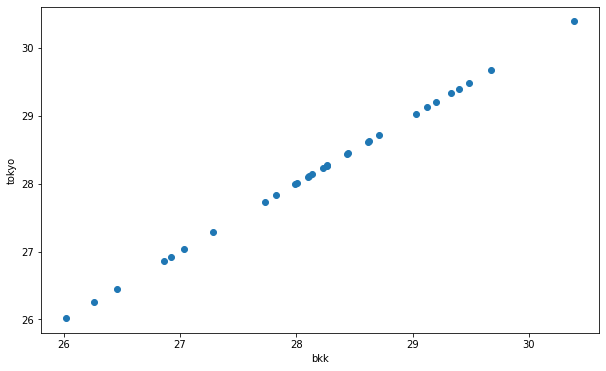

In [14]:
# scatter
plt.scatter(x=y, y=yc)
plt.xlabel('bkk')
plt.ylabel('tokyo')
plt.show()

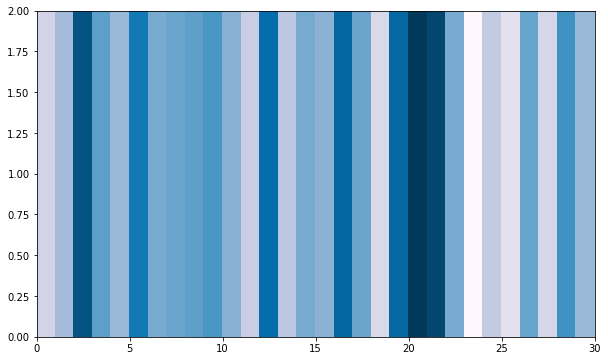

In [15]:
# colormap
plt.pcolor((y,yc),cmap='PuBu_r')
plt.show()

Plotting with pandas

In [16]:
plt.close('all')
# 4x5 point data
df4 = pd.DataFrame(tmean + np.random.rand(4,5), 
                   columns=['M', 'T', 'W', 'TH', 'S'], 
                   index=np.arange(0, 24, 6))
df4

,M,T,W,TH,S
0,28.090459,28.300700,28.113984,28.828681,28.046896
6,28.626287,28.547586,28.819287,28.198948,28.856850
12,28.351653,28.754648,28.295962,28.883936,28.325512
18,28.165016,28.392529,28.093460,28.821106,28.151152


<Figure size 720x432 with 0 Axes>

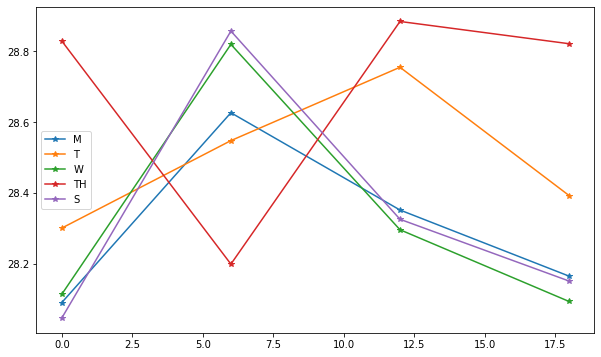

In [17]:
fig = plt.figure()
df4.plot(style='-*')
plt.show()

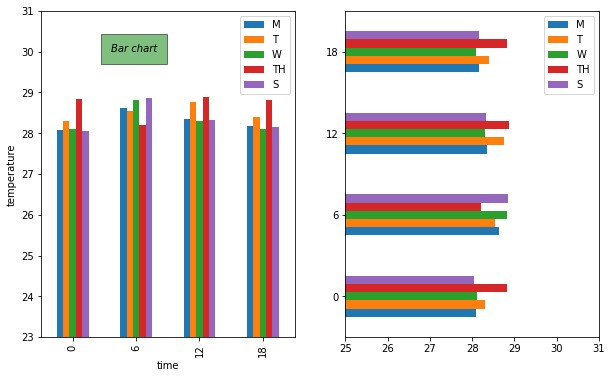

In [18]:
import matplotlib.pyplot as plt
# create matplotlib figure
fig = plt.figure()

# create matplotlib axes
ax = fig.add_subplot(121)
df4.plot(kind='bar', ax=ax)
ax.set_xlabel('time')
ax.set_ylabel('temperature')
ax.set_ylim([23,31])

ax2 = fig.add_subplot(122)
df4.plot(kind='barh', ax=ax2)
ax2.set_xlim([25,31])
ax.text(0.6, 30, 'Bar chart', style='italic',
        bbox={'facecolor': 'green', 'alpha':0.5, 'pad':10})

plt.show()

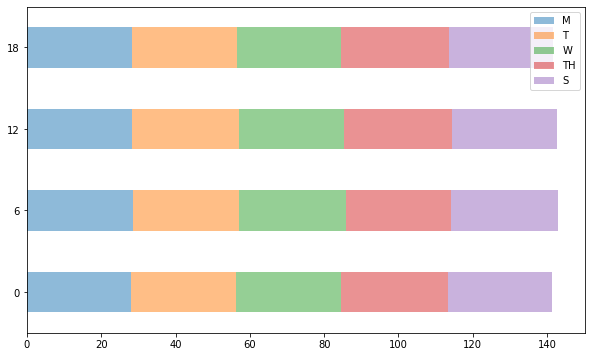

In [19]:
df4.plot.barh(stacked=True, alpha=0.5)
plt.show()

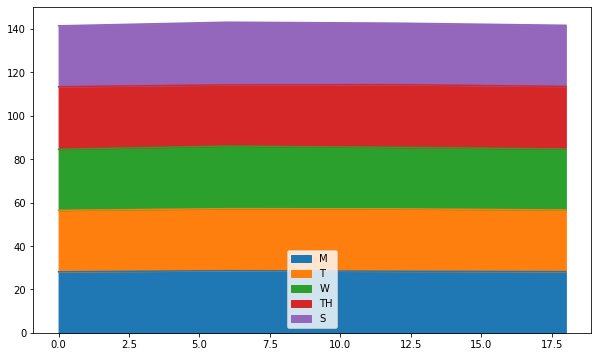

In [20]:
df4.plot.area()
plt.show()

In [21]:
df4['W'] = df4['W']/ df4['W'].sum()
df4['W']

0     0.248088
6     0.254312
12    0.249694
18    0.247907
Name: W, dtype: float64

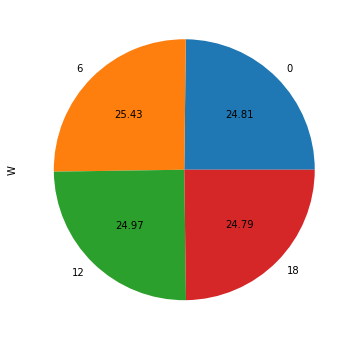

In [22]:
df4['W'].plot.pie(figsize =(6, 6),autopct='%.2f')
plt.show()

In [23]:
# 24x5 point data
dfh = pd.DataFrame(tmean+np.random.randn(24,5), 
                  columns=['m','t','w','th','f'], 
                  index=np.arange(0, 24, 1))
dfh.head()

,m,t,w,th,f
0,28.565153,27.852580,27.974095,28.289094,27.460121
1,28.708160,28.842225,28.203581,30.394704,28.917459
2,27.887728,27.637820,27.767818,27.498271,29.128785
3,27.302190,27.918878,27.470704,29.046183,26.581444
4,27.637501,27.878094,28.319356,28.460903,27.784210


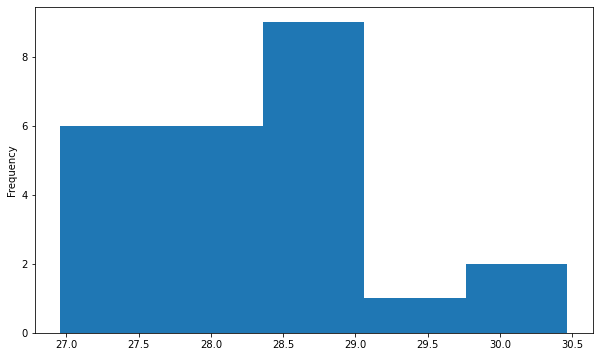

In [24]:
# compare with plt.hist(y, bins=4, color='g', alpha=5)
dfh['m'].plot.hist(bins=5)
plt.show()

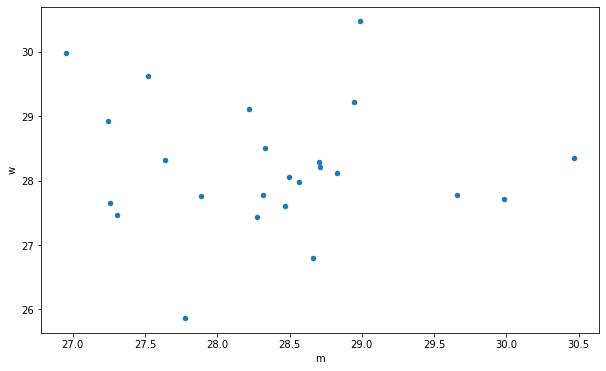

In [25]:
dfh.plot.scatter(x='m', y='w')
plt.show()

In [26]:
dfh['s'] = dfh['t']+np.random.randn(24)/5

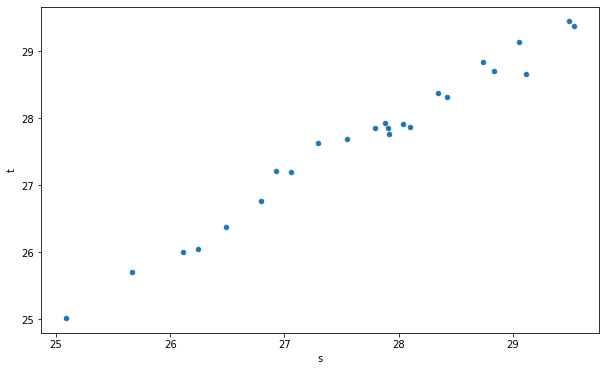

In [27]:
dfh.plot.scatter(x='s', y='t')
plt.show()

with seaborn

In [28]:
import seaborn as sns

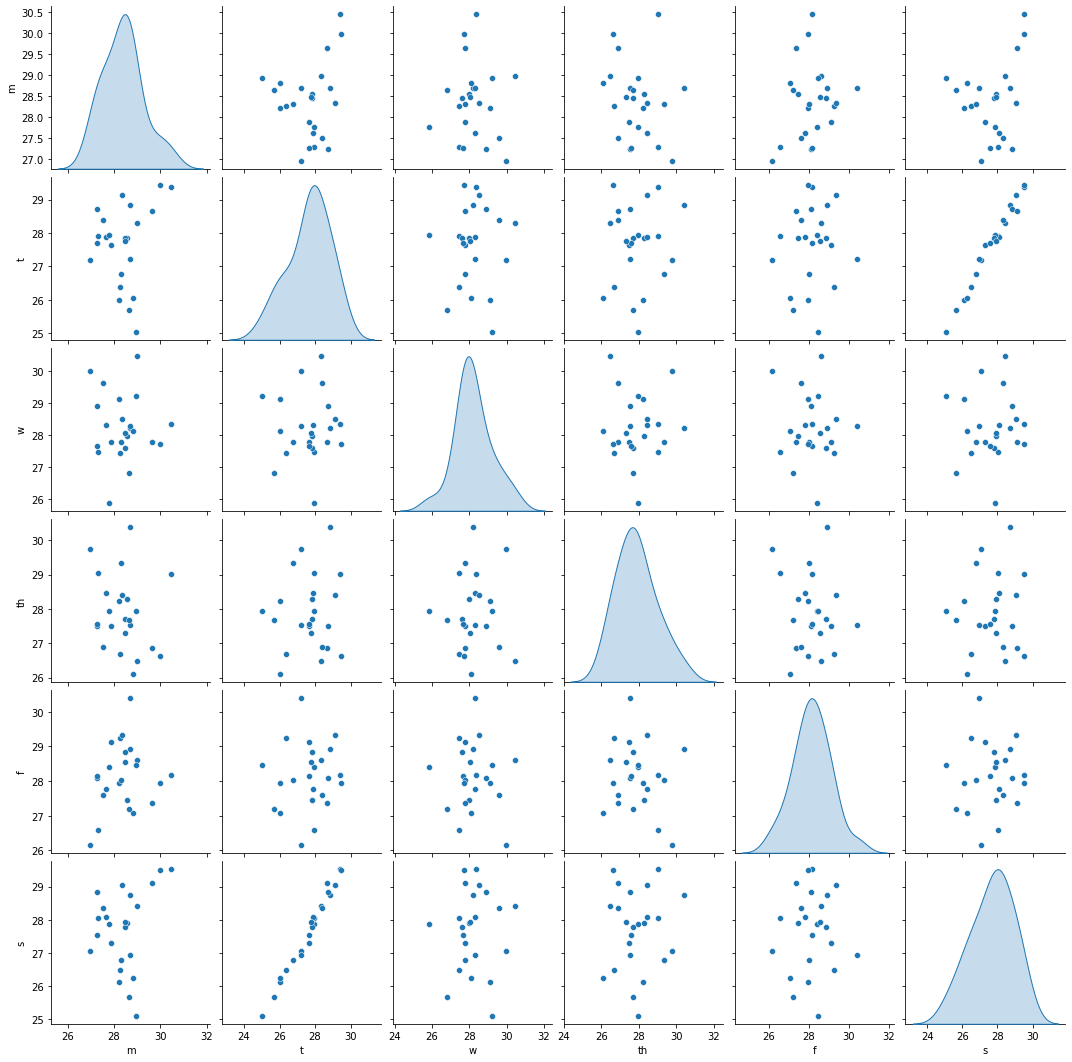

In [29]:
sns.pairplot(dfh, diag_kind='kde')

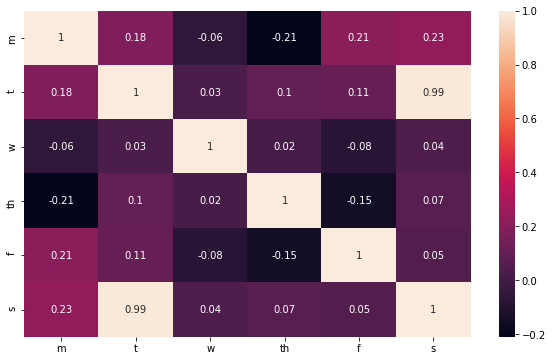

In [30]:
correlation_matrix = dfh.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)

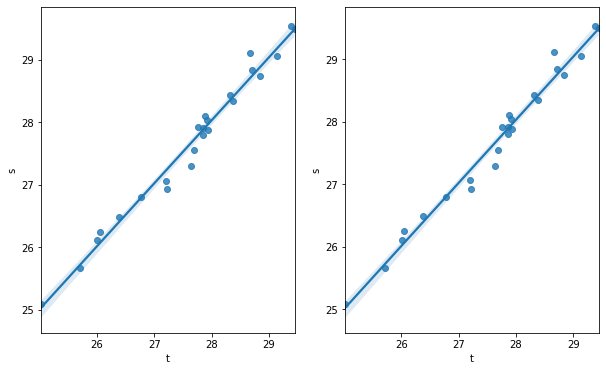

In [31]:
fig, axes = plt.subplots(1,2)
sns.regplot(x='t', y='s', data=dfh, ax=axes[0]);
sns.regplot(x='t', y='s', data=dfh, ax=axes[1]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


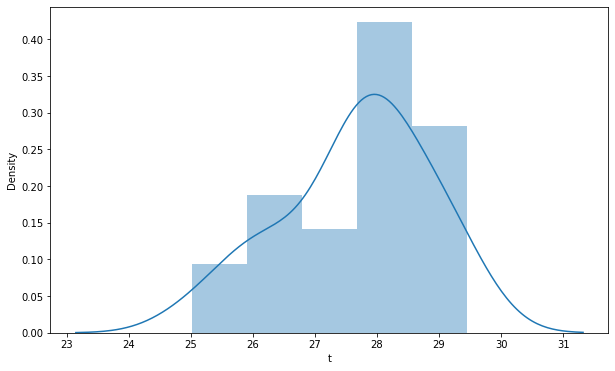

In [32]:
sns.distplot(dfh['t'])

Visualization fir category data

In [33]:
dfh['label'] = np.round(np.random.random(24))

In [34]:
dfh.head()

,m,t,w,th,f,s,label
0,28.565153,27.852580,27.974095,28.289094,27.460121,27.907414,0.0
1,28.708160,28.842225,28.203581,30.394704,28.917459,28.739243,0.0
2,27.887728,27.637820,27.767818,27.498271,29.128785,27.295605,1.0
3,27.302190,27.918878,27.470704,29.046183,26.581444,28.041337,0.0
4,27.637501,27.878094,28.319356,28.460903,27.784210,28.098120,0.0


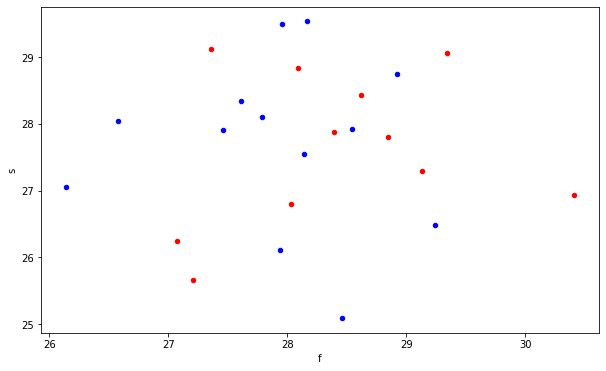

In [37]:
fig, ax = plt.subplots()
dfh.query('label>0').plot.scatter(x='f', y='s', ax=ax, color='red')
dfh.query('label<1').plot.scatter(x='f', y='s', ax=ax, color='blue')

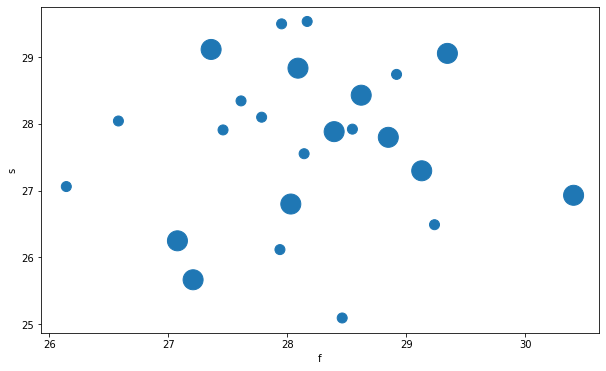

In [38]:
size = (dfh['label'].values+1) * (dfh['label'].values+1)*100
dfh.plot(kind='scatter', x='f', y='s', s=size)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


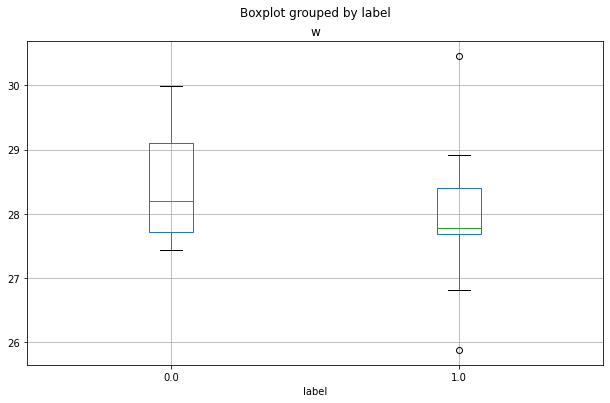

In [39]:
dfh.boxplot(by= 'label', column= ['w'], grid= True)

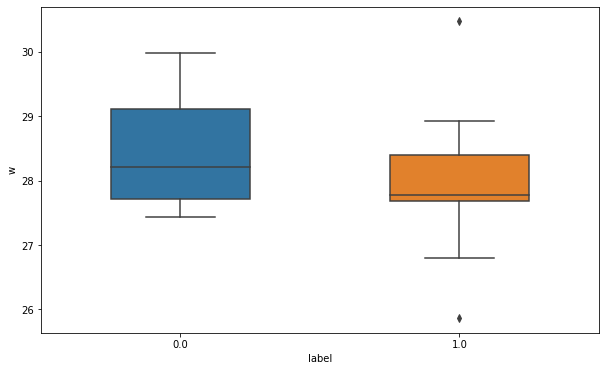

In [40]:
sns.boxplot(y= 'w', x= 'label', data=dfh, width=0.5)

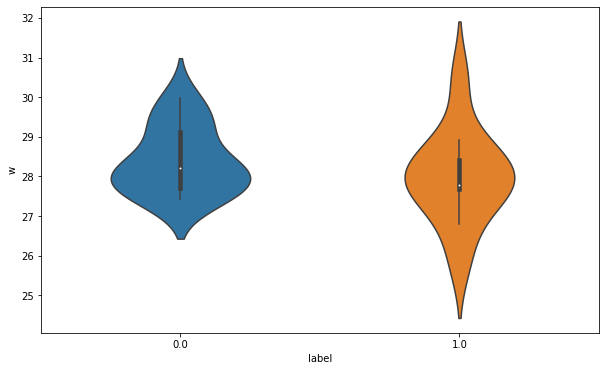

In [41]:
sns.violinplot(y= 'w', x= 'label', data=dfh, width=0.5)

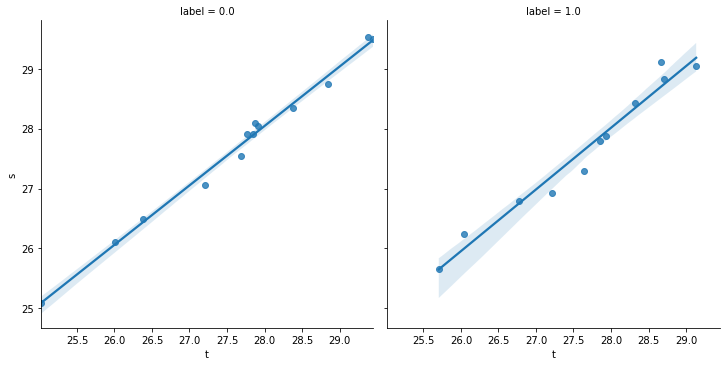

In [42]:
sns.lmplot(x='t', y='s', col='label', data=dfh);